In [1]:
import torch
import dataLoader
from model import CNN_LSTM
import numpy as np
from keras.utils.np_utils import to_categorical
import plot_cm
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib
import pylab
import torch.nn as nn

Using TensorFlow backend.


In [2]:
dl = 0  ## 时延
ts = 12 ## 滑窗宽度
lb = 1  ## 步长
modelPath = "./checkpoints/res7_12_0.09/CNN-LSTM-77.t7"  ## 模型所在地址
testRoot = "./data/test"
rRoot = "./data/r/r_0.09.txt"
saveRoot = "./results/res4_12_0.09"

In [3]:
##### 加载测试数据
X_test, y_test, mask_test = dataLoader.window_process(testRoot, rRoot, dl, 160, ts, lb)
X_test = np.array(X_test)
y_test = np.array(y_test)
mask_test = np.array(mask_test)
y_test_one = to_categorical(y_test, 22)

# 对数据进行随机打乱
permutation = np.random.permutation(X_test.shape[0])
X_test = X_test[permutation, :, :, :]
y_test_one = y_test_one[permutation, :]
mask_test = mask_test[permutation, :, :]

inputs = torch.Tensor(X_test)
target = torch.Tensor(y_test_one)
mask = torch.Tensor(mask_test)  

In [4]:
##### 加载模型
net = CNN_LSTM.CNN_LSTM(ts)
checkpoint = torch.load(modelPath)
net.load_state_dict(checkpoint['net'])

<All keys matched successfully>

In [5]:
#### 特征维度递减
def reduceChan(x):
    AAP = nn.AdaptiveAvgPool1d(1)
    m_batchsize, C, W, H = x.size()
    B_C_WH = x.view(m_batchsize, C, -1)
    B_WH_C = B_C_WH.permute(0, 2, 1)
    B_WH_C_AVG = AAP(B_WH_C).view(m_batchsize, W, H)
    return B_WH_C_AVG

In [6]:
#### 归一化
def NB(a):
    amin, amax = a.min(), a.max() # 求最大最小值
    a = (a-amin)/(amax-amin) # (矩阵元素-最小值)/(最大值-最小值)
    return a

In [7]:
##### 运行模型
net.eval()
with torch.no_grad():
    x2_atten, atten2, x3_atten, atten3, x1, x2, x3, x4, x = net(inputs, mask)

In [98]:
sample = 37
x_ = NB(X_test[sample].reshape(12, 52))
x1_ = NB(reduceChan(x1[sample:sample+1]).view(12, 52))
x2_ = NB(reduceChan(x2[sample:sample+1]).view(12, 52))
x2_atten_ = NB(reduceChan(x2_atten[sample:sample+1]).view(12, 52))
x3_ = NB(reduceChan(x3[sample:sample+1]).view(12, 52))
x3_atten_ = NB(reduceChan(x3_atten[sample:sample+1]).view(12, 52))
x4_ = NB(reduceChan(x4[sample:sample+1]).view(12, 52))

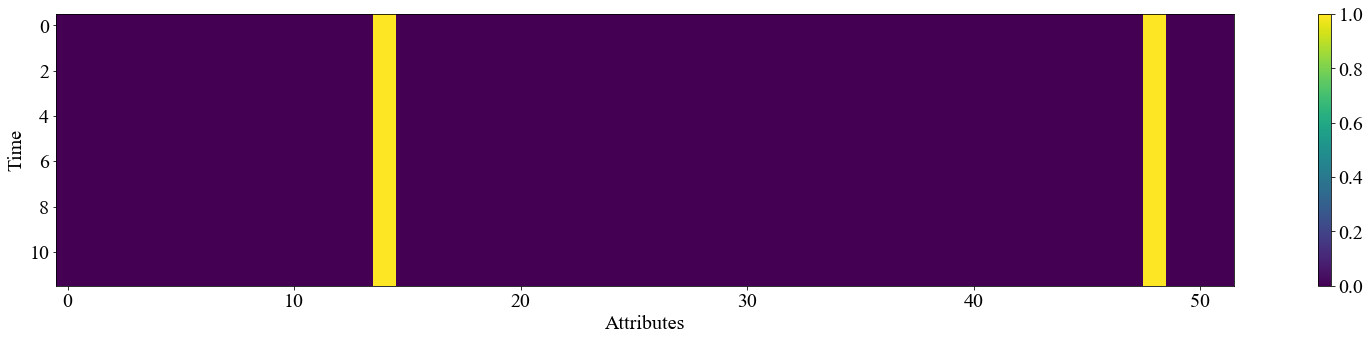

In [99]:
mask_ = NB(mask[sample])
plt.figure(figsize=(30,5))
plt.imshow(mask_)
plt.colorbar()
plt.ylabel('Time')
plt.xlabel('Attributes')
plt.savefig("./results/fe_new" + str(sample) + "_mask.svg")

In [100]:
##### 定义图片上的字体
font = {'family': 'Times New Roman',
         'style': 'normal',
         'weight': 'bold',
        #'color':  'darkred', 
        'size': 20,
        }
matplotlib.rc('font', **font)

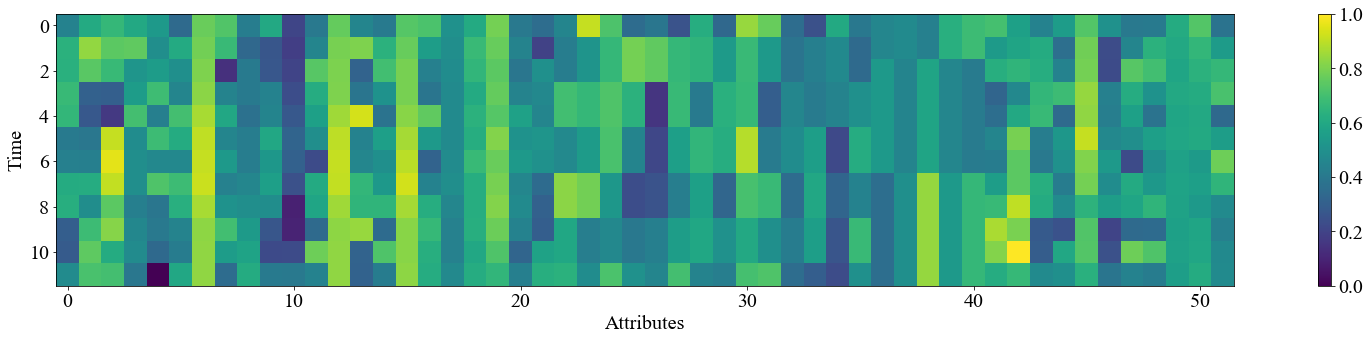

In [101]:
plt.figure(figsize=(30,5))
plt.imshow(x_)
plt.colorbar()
plt.ylabel('Time')
plt.xlabel('Attributes')
plt.savefig("./results/fe_new" + str(sample) + "_1.svg")

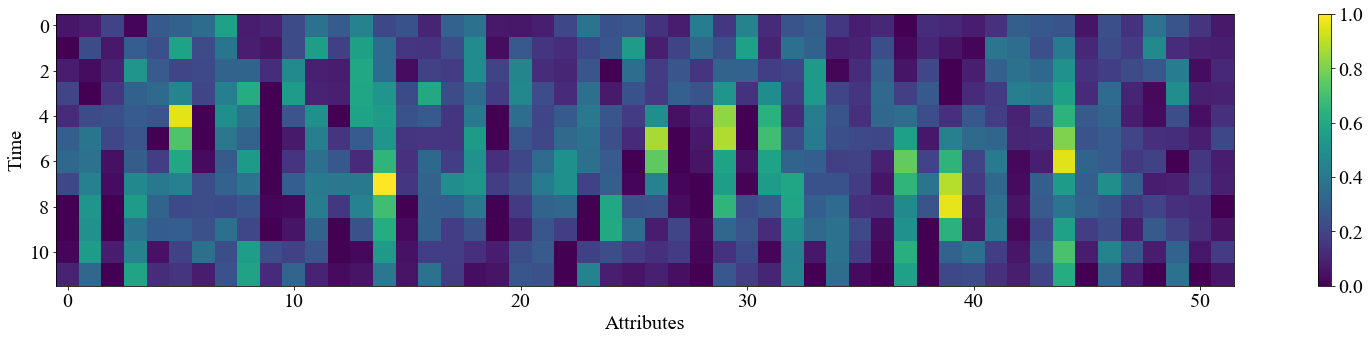

In [102]:
plt.figure(figsize=(30, 5))
plt.imshow(x1_)
plt.colorbar()
plt.ylabel('Time')
plt.xlabel('Attributes')
plt.savefig("./results/fe_new" + str(sample) + "_2.svg")

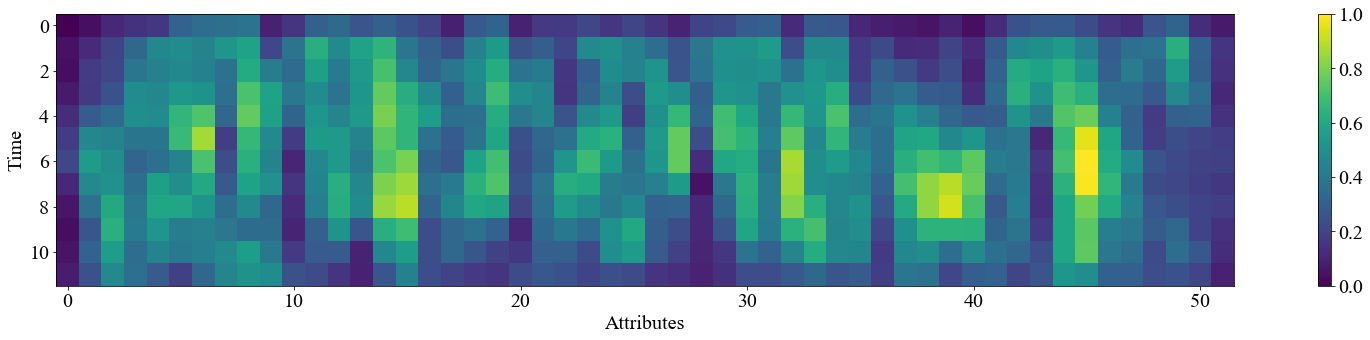

In [103]:
plt.figure(figsize=(30, 5))
plt.imshow(x2_)
plt.colorbar()
plt.ylabel('Time')
plt.xlabel('Attributes')
plt.savefig("./results/fe_new" + str(sample) + "_3.svg")

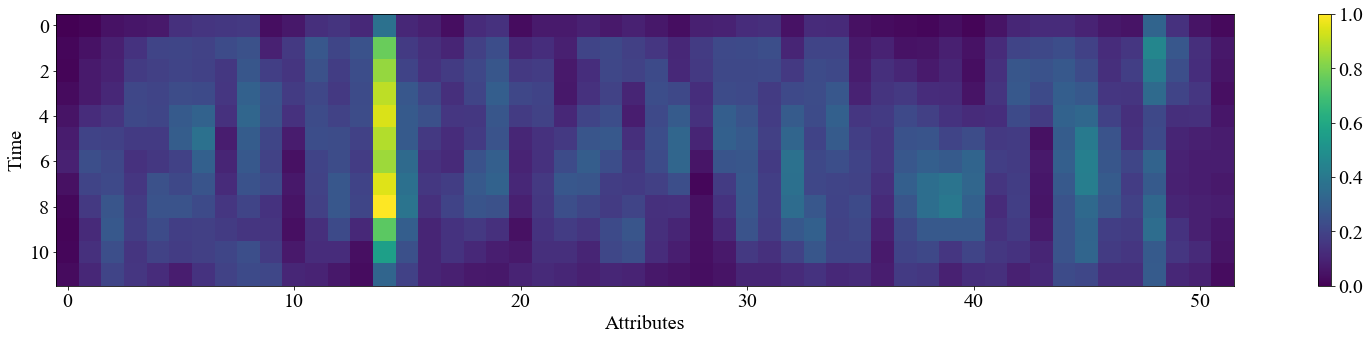

In [104]:
plt.figure(figsize=(30, 5))
plt.imshow(x2_atten_)
plt.colorbar()
plt.ylabel('Time')
plt.xlabel('Attributes')
plt.savefig("./results/fe_new" + str(sample) + "_4.svg")

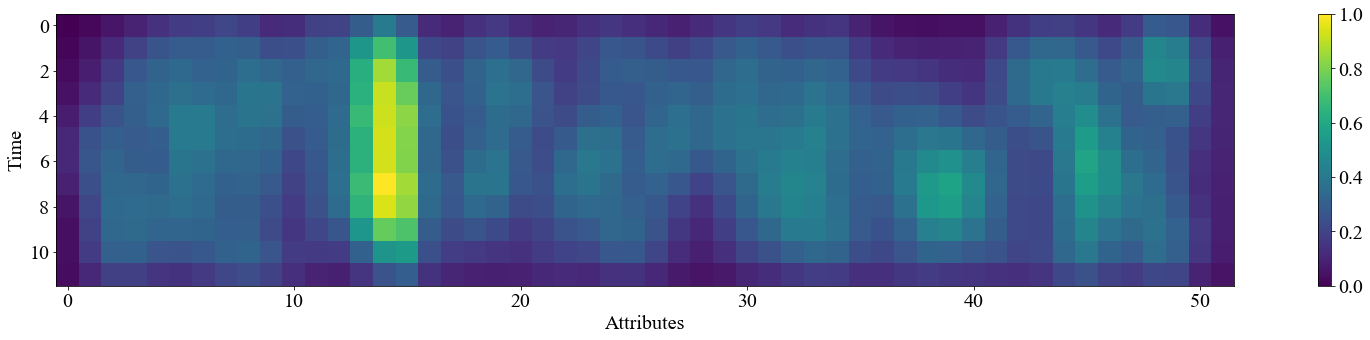

In [105]:
plt.figure(figsize=(30, 5))
plt.imshow(x3_)
plt.colorbar()
plt.ylabel('Time')
plt.xlabel('Attributes')
plt.savefig("./results/fe_new" + str(sample) + "_5.svg")

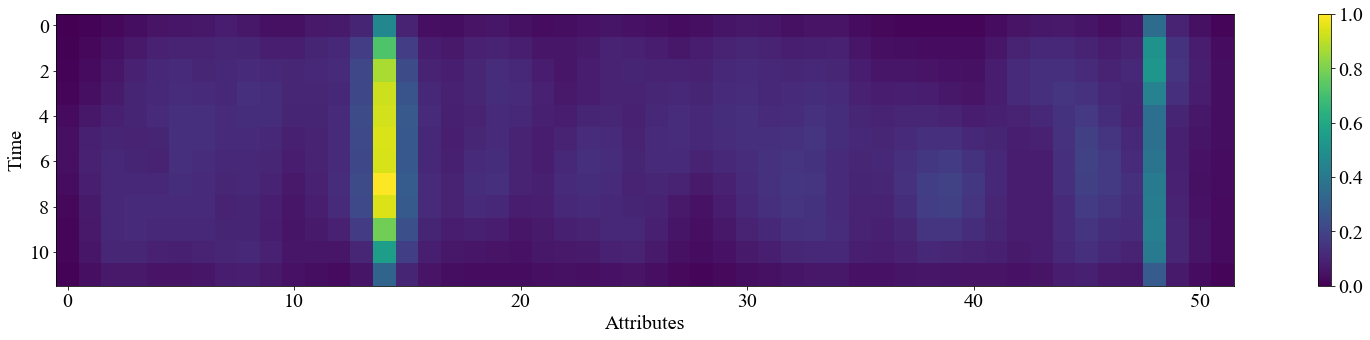

In [106]:
plt.figure(figsize=(30, 5))
plt.imshow(x3_atten_)
plt.colorbar()
plt.ylabel('Time')
plt.xlabel('Attributes')
plt.savefig("./results/fe_new" + str(sample) + "_6.svg")

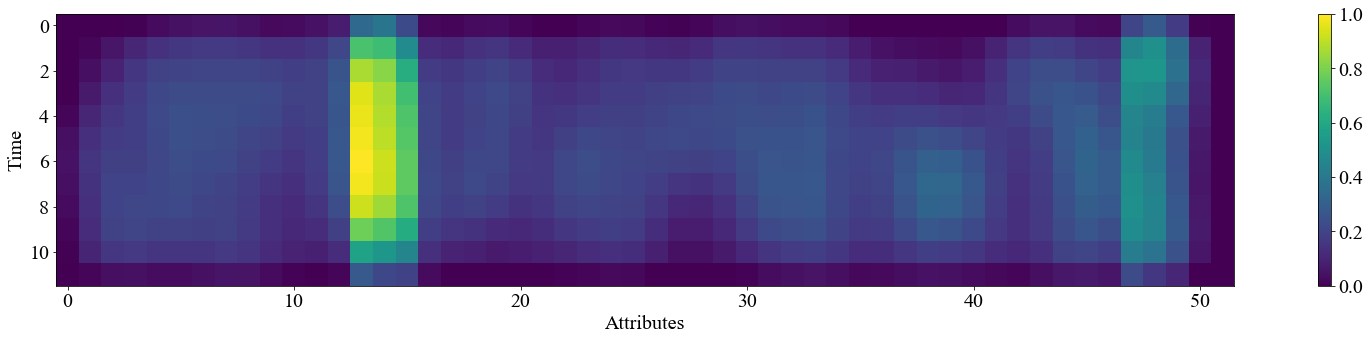

In [107]:
plt.figure(figsize=(30, 5))
plt.imshow(x4_)
plt.colorbar()
plt.ylabel('Time')
plt.xlabel('Attributes')
plt.savefig("./results/fe_new" + str(sample) + "_7.svg")

In [108]:
print(y_test_one[sample])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
